In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# seed : random 에서 발생된 생성한 값을 고정
# randn : 정규분포에서 샘플을 반환
np.random.seed(1)
x = np.sort(np.random.rand(50))

y = np.cos(1.5 * np.pi * x) + np.random.randn(50) * 0.3

x = x.reshape(-1, 1)

In [3]:
print(x.shape)
print(y.shape)

(50, 1)
(50,)


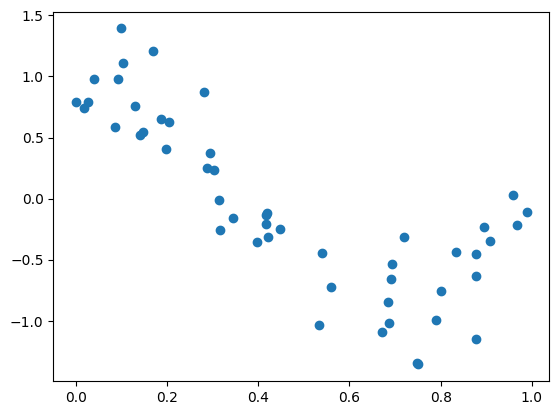

In [4]:
plt.scatter(x, y)

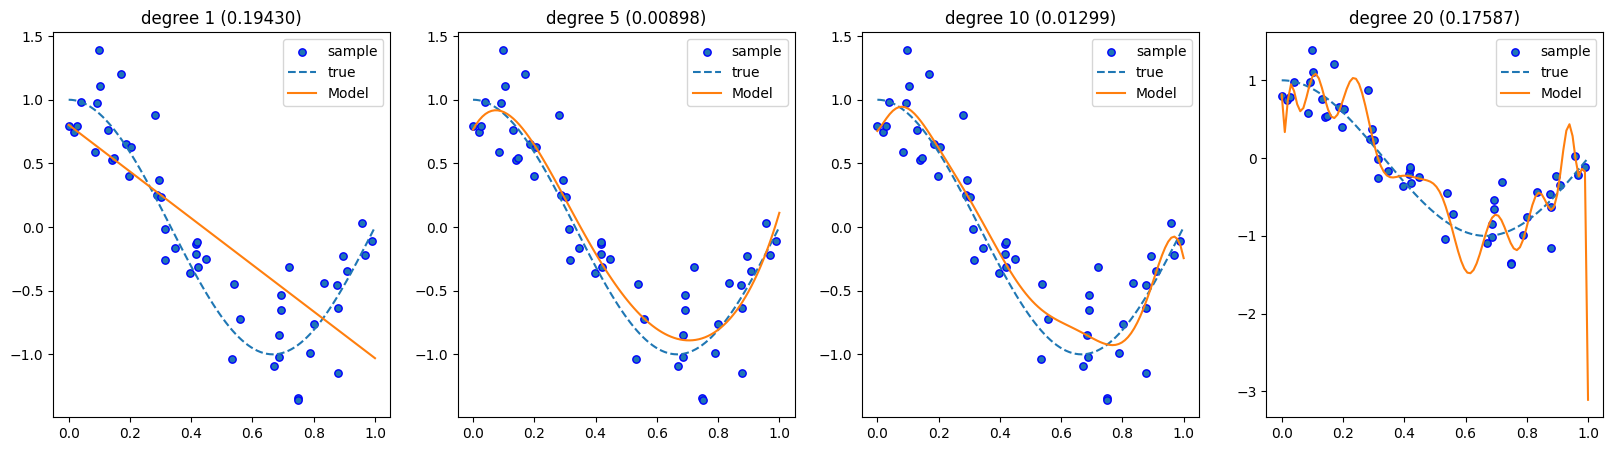

In [ ]:
plt.figure(figsize=(20, 5))

degrees = [1, 5, 10, 20]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    # 노이즈 있는 값(실제값) 곡선
    plt.scatter(x, y, edgecolors="b", s =28, label="sample")

    # 노이즈 없는 값 곡선

    x_test = np.linspace(0, 1, 100)
    y_test = np.cos(1.5 * np.pi * x_test)

    plt.plot(x_test, y_test, "--", label ="true")

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)

    x_poly = poly.fit_transform(x)
    model= LinearRegression()
    model.fit(x_poly,y)
    
    predict = model.predict(poly.fit_transform(x_test.reshape(-1, 1)))
    plt.plot(x_test, predict, label = 'Model')

    plt.title(f"degree {degrees[i]} ({mean_squared_error(y_test, predict):.5f})") 
    plt.legend()

plt.show()




노이즈 없는 값으로 만든 cosine 곡선과 다항회귀 차수에 따른 곡선 분석!

- 차수가 높이질 수록 노이즈 있는 값 (실제 값)에 가까워지지만, 차수만큼 거듭제곱하기 때문에 mse는 오히려 높아진다. 
    => mse 값을 만들때 제곱의 평균값으로 하였고 또 다항회귀에서 차수를 늘렸기 때문에 제곱이 많아져서 결론적으로 제곱이 많아짐으로 mse(lost function)은 더 높아지는 현상이 발생하고 이로써 신뢰하기 힘든 값이 된다.

- 이런 상황을 두고 과대적합 (overfitting) 되었다고 말한다.

과소적합 (underfitting) : 주어진 입력 데이터에 비하여 모델의 복잡도가 너무 낮아, 입력 데이터로부터 충분히 학습하지 못하는 상황

과대적합 (overfitting) :  주어진 입력 데이터에 비하여 모델의 복잡도가 너무 높아, 입력데이터의 잡음까지 fitting 하는 경향을 보이는 상황 -> 일반화에 실패